# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread("../../_m/genes/diffExpr_maleVfemale_FDR05.txt") %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000229807.10,ENSG00000229807,XIST,-9.296137,1.953623e-272
ENSG00000114374.12,ENSG00000114374,USP9Y,8.683679,1.953623e-272


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

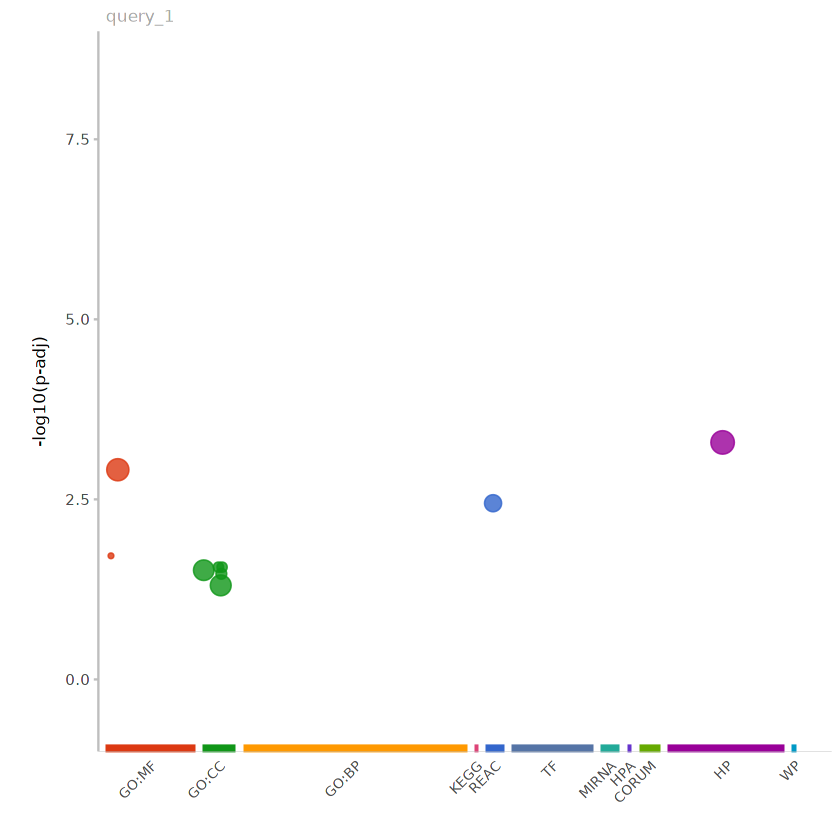

In [4]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "allDEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("allDEGs_manhattan", p, 9, 5)

In [5]:
gostres$result 

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
query_1,TRUE,0.0276133974,19,247,4,0.01619433,0.21052632,GO:0043186,GO:CC,P granule,18964,2109,"GO:0036464, GO:0060293"
query_1,TRUE,0.0276133974,19,247,4,0.01619433,0.21052632,GO:0060293,GO:CC,germ plasm,18964,2601,GO:0045495
query_1,TRUE,0.0304527360,111,247,8,0.03238866,0.07207207,GO:0000786,GO:CC,nucleosome,18964,108,"GO:0000785, GO:0032993, GO:0044815"
query_1,TRUE,0.0341649388,20,247,4,0.01619433,0.20000000,GO:0045495,GO:CC,pole plasm,18964,2498,GO:0005737
query_1,TRUE,0.0494796315,119,247,8,0.03238866,0.06722689,GO:0044815,GO:CC,DNA packaging complex,18964,2417,GO:0032991
query_1,TRUE,0.0012262224,173,243,12,0.04938272,0.06936416,GO:0005201,GO:MF,extracellular matrix structural constituent,18679,1697,GO:0005198
query_1,TRUE,0.0192182533,16,243,4,0.01646091,0.25000000,GO:0004115,GO:MF,"3',5'-cyclic-AMP phosphodiesterase activity",18679,767,GO:0004114
query_1,TRUE,0.0005117774,257,73,17,0.23287671,0.06614786,HP:0010985,HP,Gonosomal inheritance,4511,7444,HP:0000005
query_1,TRUE,0.0035767152,50,159,7,0.04402516,0.14000000,REAC:R-HSA-3214842,REAC,HDMs demethylate histones,10622,999,REAC:R-HSA-3247509


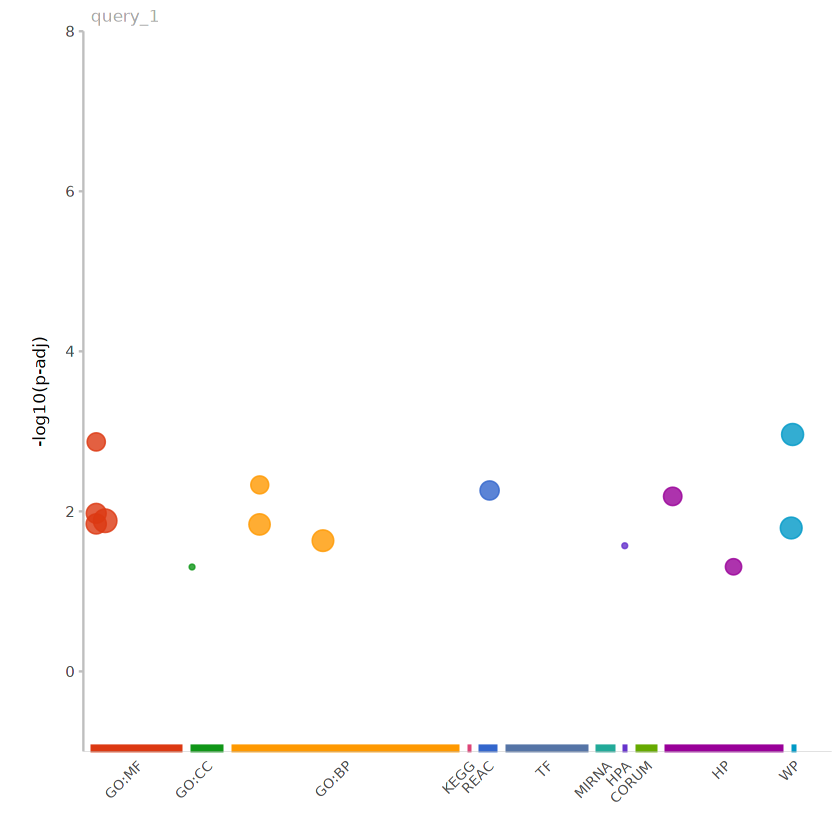

In [6]:
deg_male = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_male$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "male_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("male_bias_DEGs_manhattan", p, 9, 5)

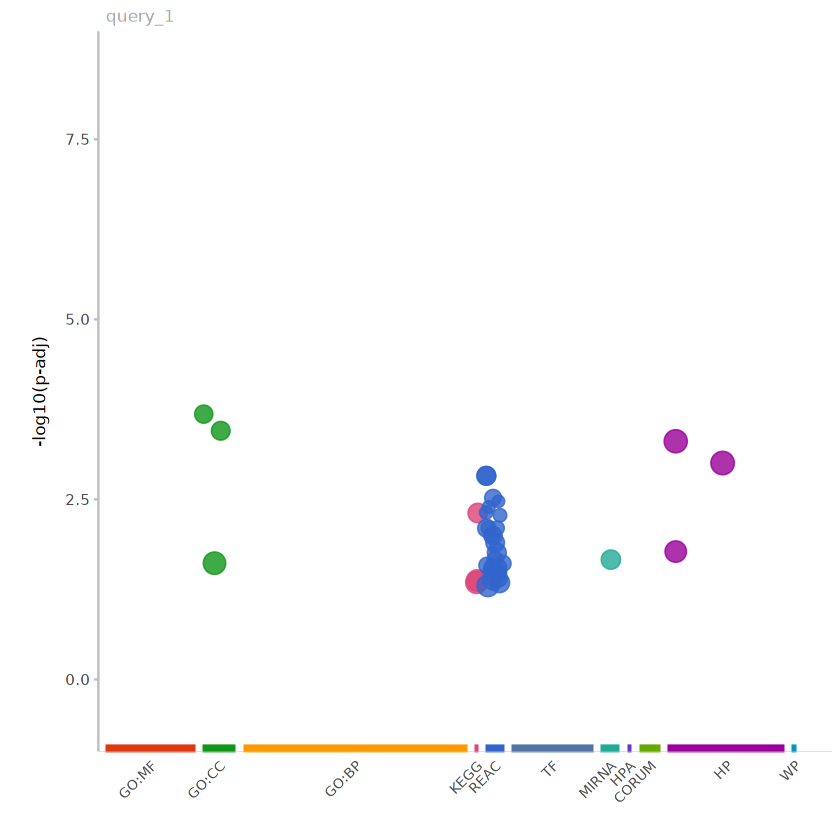

In [7]:
deg_female = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_female$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "female_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("female_bias_DEGs_manhattan", p, 9, 5)